# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitable item is the one that generates the most profit after covering the initial cost of the item. This depends on the relationship between the number of items sold and the item’s mark-up, since the item has to both sell enough and have a markup that covers the business’ investment. 


Overall most profitable item:
                Category Name  total_profit
24          CANADIAN WHISKIES     921317.22
15            AMERICAN VODKAS     878724.32
77  STRAIGHT BOURBON WHISKIES     534492.37
76                 SPICED RUM     472589.23
88            WHISKEY LIQUEUR     420905.32
..                        ...           ...
16                   ANISETTE        199.67
74         SPEARMINT SCHNAPPS        153.07
69                 ROCK & RYE        144.55
31            CREME DE ALMOND         65.90
90      WHITE CREME DE MENTHE         58.36

[92 rows x 2 columns]


Text(0.5, 1.0, 'Top 20 Most Profitable Liquors')

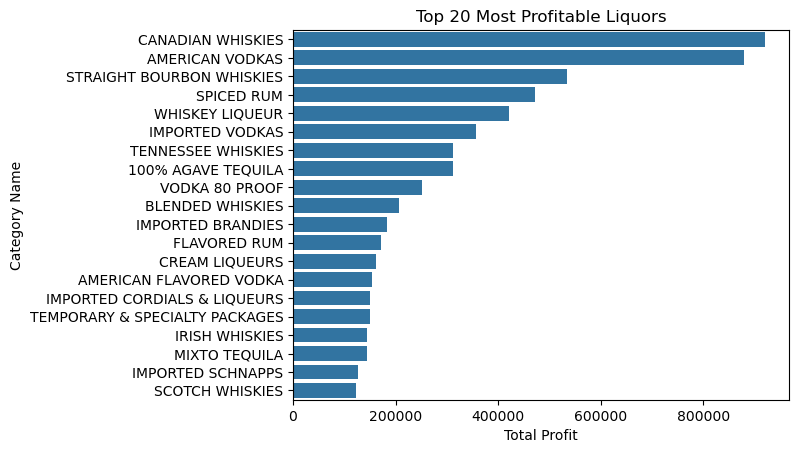

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('../data/iowa.csv')

df['total_profit'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']
most_profitable_item = df.groupby('Category Name')['total_profit'].sum().reset_index()


overall_most_profitable_item = most_profitable_item.sort_values(by='total_profit', ascending=False)
print("\nOverall most profitable item:")
print(overall_most_profitable_item)

top_bottles = overall_most_profitable_item[:20]
sns.barplot(top_bottles,x='total_profit', y= 'Category Name', orient ='h')
plt.xlabel("Total Profit")
plt.title("Top 20 Most Profitable Liquors")


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

When we try to subtract the two verctors, we get a ValueError since the vectors are not the same shape (3,) and (2,). 
When we try to reshape the second time, we get an array that is (3,2). When we try the third method, we get a (2,3) array.
In x.reshape(-1,1) the -1 indicates to NumPy that it needs to figure out how many rows are in the column in order to fit all elements. Similarly, in x.reshape(1,-1) the -1 lets NumPy figure out how many columns are required so that all elements fit into a row. 

In [ ]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

result = []
for xi in x:
    row = []
    for yj in y:
        row.append(xi - yj)
    result.append(row)

result2 = []
for yi in y:
    row = []
    for xj in x:
        row.append(xj - yi)
    result2.append(row)
    
result = np.array(result)
result2= np.array(result2)
print(result)
print(result2)


[[-1 -4]
 [ 1 -2]
 [ 3  0]]
[[-1  1  3]
 [-4 -2  0]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$, because in any case either x<= z or x>= z is true, which means only one indicator function will output 1 and the other will output 0. Therefore, when we do 1- {x<=z} = {x>z} only one of the functions will be true and output 1 and the other zero, allowing equivalence. 

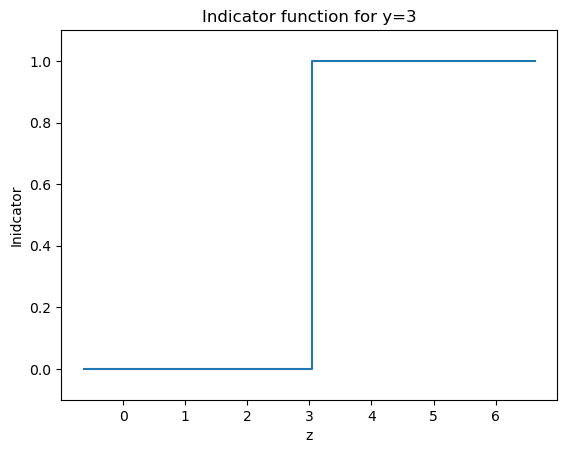

In [14]:
import matplotlib.pyplot as plt

grid = np.linspace(x.min()-x.std(),x.max()+x.std(),100)
y=3

def indicate(y,grid):
    return y <= grid

indicator = indicate(y,grid)

plt.step(grid, indicator,where='post')
plt.xlabel("z")
plt.ylabel("Inidcator")
plt.title("Indicator function for y=3")
plt.ylim(-0.1,1.1)
plt.show()



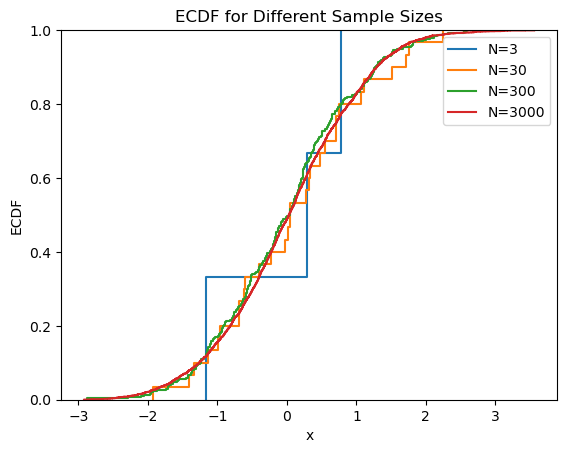

In [15]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(X, label=f"N={N}")
    
    plt.xlabel("x")
    plt.ylabel("ECDF")
    plt.title(f"ECDF for Different Sample Sizes")
    plt.legend()


As the sample size, N, increases, the ECDF curve becomes smoother, while a small sample size results in a more jagged curve. This occurs because in the ECDF formula, the (1/N) factor is responsible for the height of each step on the y-axis, resulting in smaller steps and a smoother curve when sample size is large. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [22]:
def compute_quantile(x, q):
    sorted_data = np.sort(x)
    index= q*(len(x)-1)
    lower_quantile = int(np.floor(index))
    upper_quantile = int(np.ceil(index))

    if lower_quantile == upper_quantile:
        return sorted_data[lower_quantile]
    else:
        return sorted_data[lower_quantile] + (index - lower_quantile) * (sorted_data[upper_quantile] - sorted_data[lower_quantile])


In [25]:
def compute_iqr(x):
    q1 = compute_quantile(x, 0.25)
    q3 = compute_quantile(x, 0.75)
    return q3 - q1

def compute_whiskers(x):
    lower_whisker= compute_quantile(x, 0.25) - 1.5 * compute_iqr(x)
    upper_whisker= compute_quantile(x, 0.75) + 1.5 * compute_iqr(x)
    return lower_whisker, upper_whisker
    

In [26]:
def five_num_summary(x):
    x= np.sort(x)
    q1 = compute_quantile(x, 0.25)
    median = compute_quantile(x, 0.5)
    q3 = compute_quantile(x, 0.75)
    whiskers = compute_whiskers(x)

    return {'minimum': min(x),'q1': q1, 'median': median, 'q3': q3, 'maximum': max(x), 'whiskers': whiskers}

In [ ]:
def obs_outliers(x):
    lower_whisker, upper_whisker = compute_whiskers(x)
    return (x < lower_whisker) | (x > upper_whisker)

Applied Functions:
{'minimum': 326, 'q1': 950.0, 'median': 2401.0, 'q3': 5324.25, 'maximum': 18823, 'whiskers': (-5611.375, 11885.625)}
Pandas Descriptive Statistics:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


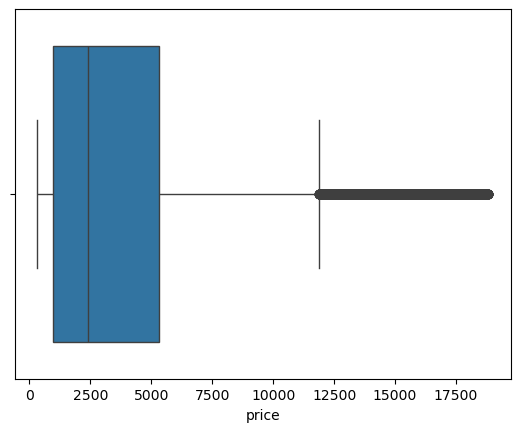

In [28]:
df = sns.load_dataset("diamonds")
vals = df["price"].values

print("Applied Functions:")
print(five_num_summary(vals))
print("Pandas Descriptive Statistics:")
print(df["price"].describe())

sns.boxplot(x = df["price"])
plt.show()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?